In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv("data_bank.csv")

In [5]:
data.head()

,CustomerID,Age,Balance,Tenure_Years,IsActiveMember,Churn
0,1001,56,68215,1,1,0
1,1002,69,70042,9,1,1
2,1003,46,145356,3,0,1
3,1004,32,94468,7,1,1
4,1005,60,193461,8,0,0


<Axes: >

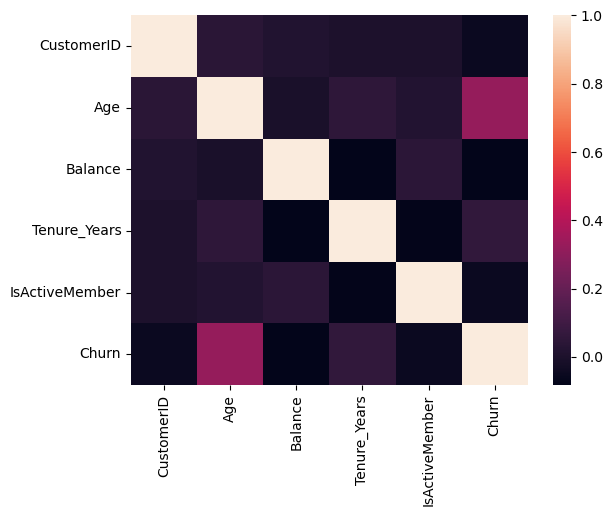

In [6]:
cors = data.corr()
sns.heatmap(cors)

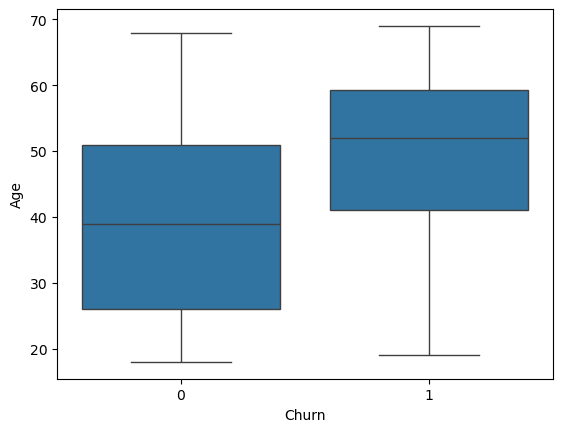

In [8]:
sns.boxplot(x = "Churn", y = "Age", data = data)
plt.show()

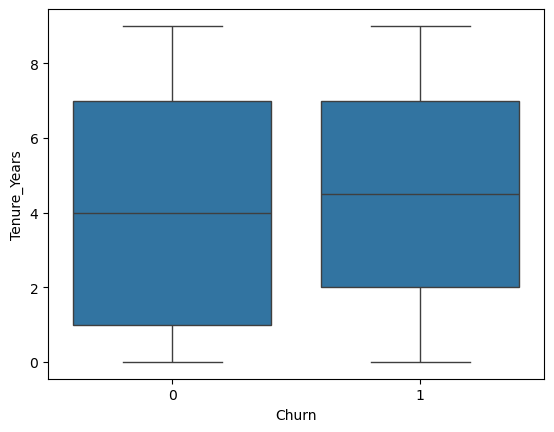

In [11]:
sns.boxplot(x = "Churn", y = "Tenure_Years", data = data)
plt.show()

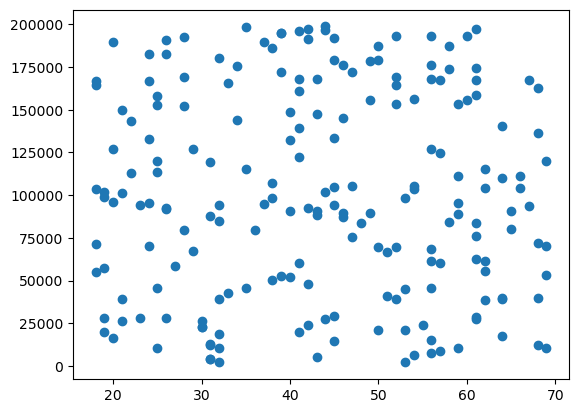

In [16]:
plt.scatter(data['Age'], data['Balance'])

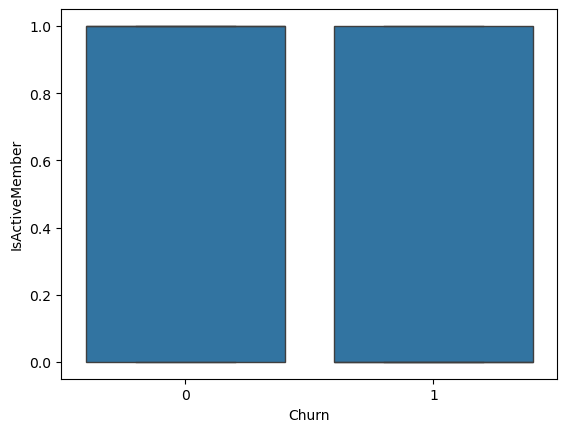

In [13]:
sns.boxplot(x = "Churn", y = "IsActiveMember", data = data)
plt.show()

In [20]:
y = data["Churn"]
x = data[["Age","Balance","Tenure_Years","IsActiveMember"]]

In [22]:
from sklearn.model_selection import train_test_split

x_tr, x_ts, y_tr, y_ts = train_test_split(x, y, test_size = 0.2)
from sklearn.preprocessing import StandardScaler
scaling = StandardScaler()
scaling.fit(x_tr)

,copy,True
,with_mean,True
,with_std,True


In [27]:
scaler = StandardScaler()
x_tr = scaler.fit_transform(x_tr)
x_ts = scaler.transform(x_ts)

In [29]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(x_tr, y_tr)
model.score(x_ts, y_ts)

0.625

In [44]:
from sklearn.pipeline import make_pipeline
test_score = []
for lam in np.arange(0.01, 100, 0.1):
    pipe = make_pipeline(StandardScaler(), LogisticRegression(C = 1/lam))
    pipe.fit(x_tr, y_tr)
    scores = pipe.score(x_ts, y_ts)
    test_score.append(scores)

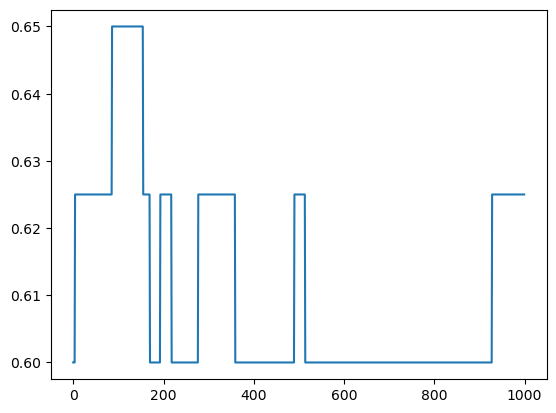

In [46]:
plt.plot(test_score)

In [40]:
np.argmax(test_score)

np.int64(86)

In [39]:
model.coef_
#data = ["Age", "Balance", "Tenure_Years", "IsActiveMember"]

array([[ 0.88540232, -0.02065237,  0.17111478, -0.20005808]])

In [41]:
 l_best = 0.01 * 86 * 0.1